# Duplicate Data Removal

In [1]:
import pandas as pd

In [14]:
data = {'name': ['a', 'b', 'c', 'd', 'a', 'c'],'eng': [8,7,5, 8, 8, 5], 'hindi': [2,3,4,5,2,4]}
df=pd.DataFrame(data)
df

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,4


In [21]:
df.drop_duplicates(keep='first', inplace=True)

In [23]:
dataset = pd.read_csv('E:\\titanic.csv')
dataset.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [27]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [29]:
dataset.shape

(1309, 14)

In [30]:
dataset.drop_duplicates(inplace=True)

In [32]:
dataset.shape

(1309, 14)

# Replace and Change Data Types

In [34]:
dataset.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [35]:
dataset['ticket'].isnull().sum()

np.int64(0)

In [36]:
dataset['ticket'].value_counts()

ticket
CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: count, Length: 929, dtype: int64

In [37]:
dataset['ticket'].replace('CA. 2343', '2343', inplace=True)

C:\Users\awais\AppData\Local\Temp\ipykernel_10228\387162333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['ticket'].replace('CA. 2343', '2343', inplace=True)


In [39]:
dataset['ticket'].value_counts()

ticket
2343        11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: count, Length: 929, dtype: int64

In [44]:
dataset['ticket']=dataset['ticket'].replace('CA 2144', '2144').replace('PC 17608', '17608').replace('PC 17609', '17609')

dataset['ticket'].value_counts()

ticket
2343       11
1601        8
2144        8
17608       7
347077      7
           ..
373450      1
2223        1
350046      1
3101281     1
315082      1
Name: count, Length: 929, dtype: int64

In [46]:
dataset['ticket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: ticket
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


# Function Transformer

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\awais\AppData\Local\Temp\ipykernel_10228\118973609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sibsp'])


<Axes: xlabel='sibsp', ylabel='Density'>

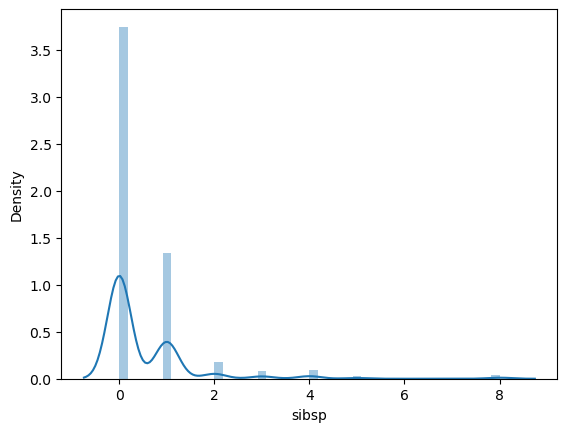

In [48]:
sns.distplot(dataset['sibsp'])

In [49]:
q1 = dataset['sibsp'].quantile(0.25)
q3 = dataset['sibsp'].quantile(0.75)
IQR = q3-q1


In [50]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
min_range, max_range

(np.float64(-1.5), np.float64(2.5))

In [52]:
dataset_new=dataset[dataset['sibsp']<=max_range]

C:\Users\awais\AppData\Local\Temp\ipykernel_10228\3081377197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new['sibsp'])


<Axes: xlabel='sibsp', ylabel='Density'>

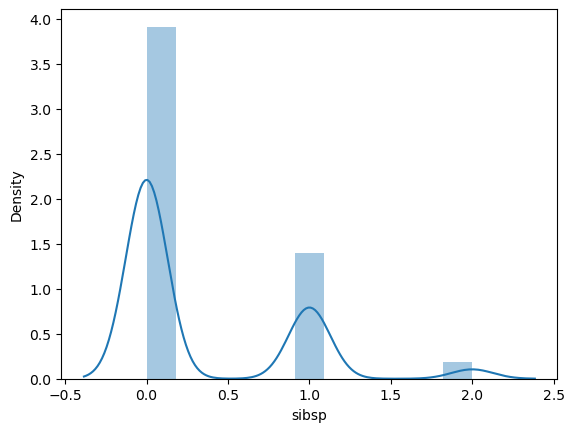

In [53]:
sns.distplot(dataset_new['sibsp'])

In [55]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [67]:
ft = FunctionTransformer(func=np.log1p)
dataset_new['New_TF']=ft.fit_transform(dataset_new[['sibsp']])

C:\Users\awais\AppData\Local\Temp\ipykernel_10228\846533984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['New_TF']=ft.fit_transform(dataset_new[['sibsp']])


In [68]:
dataset[['sibsp', 'New_TF']]

,sibsp,New_TF
0,0,0.000000
1,1,0.693147
2,1,0.693147
3,1,0.693147
4,1,0.693147
...,...,...
1304,1,0.693147
1305,1,0.693147
1306,0,0.000000
1307,0,0.000000


C:\Users\awais\AppData\Local\Temp\ipykernel_10228\2696247768.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new['sibsp'])
C:\Users\awais\AppData\Local\Temp\ipykernel_10228\2696247768.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['New_TF'])
C:\Users\awais\AppData\Local\

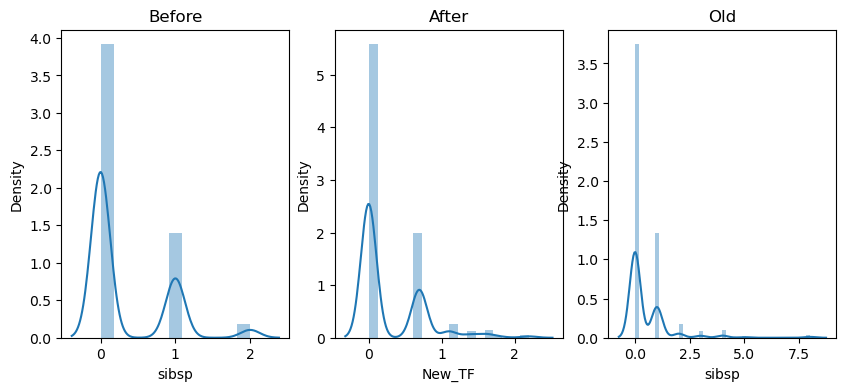

In [69]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title('Before')
sns.distplot(dataset_new['sibsp'])
plt.subplot(1,3,2)
plt.title('After')
sns.distplot(dataset['New_TF'])
plt.subplot(1,3,3)
plt.title('Old')
sns.distplot(dataset['sibsp'])
plt.show()

# Feature Selection Tecniques
## Backward Elimination (using MLxtend) &
## Forward Elimination (using MLxtend)

In [71]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -----------------------

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector


In [74]:
dataset.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,New_TF
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.000000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.693147


In [75]:
x=dataset.iloc[:,:-1]
y = dataset['New_TF']

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()

In [ ]:
fs = SequentialFeatureSelector(lr, k_features=13, forward=True)
fs.fit(x,y)

# Train Test Split in Data Set

In [80]:
dataset.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,New_TF
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.0


In [85]:
TT = dataset.select_dtypes(include=['int64'])

In [88]:
input_data = TT.iloc[:,:-1]
output_data = TT['parch']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.25)

In [93]:
x_train.shape

(981, 3)

In [94]:
x_test.shape

(328, 3)

In [96]:
y_train.shape

(981,)

In [97]:
y_test.shape

(328,)

# Regression Analysis